In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df=pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df["smoker"] = df["smoker"].map({'yes':1, 'no':0})

In [5]:
df["sex"] = df["sex"].map({'male':1, 'female':0})

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
df=df.drop('region', axis=1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [9]:
X=df[["age", "sex", "bmi", "children", "smoker"]]
y=df["charges"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Veri bölme işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [14]:
# 2. Modeli eğitim verilerimizle eğitiyoruz (Öğrenme burada gerçekleşiyor)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred=model.predict(X_test)

In [17]:
type(y_pred)

numpy.ndarray

In [19]:
print(f"Modelin tahminleri : {y_pred[:5]}") # ilk 5 tahmin

Modelin tahminleri : [ 8554.81711589  6973.58746745 36798.60416104  9417.88282303
 26871.68031081]


In [20]:
print(f"Gerçek Sonuçlar : {y_test[:5]}") # ilk 5 sonuç

Gerçek Sonuçlar : 764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64


In [21]:
from sklearn.metrics import r2_score, mean_absolute_error

In [22]:
score=r2_score(y_test, y_pred) # R2 Skoru (Modelin veriyi açıklama başarısı)
mae=mean_absolute_error(y_test, y_pred) # Ortalama Hata (Model tahminlerinde ortalama kaç dolar sapıyor?)

In [23]:
print(f"R² skoru: {score}")
print(f"MAE: {mae}")

R² skoru: 0.7811302113434097
MAE: 4213.4847978071375


In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# Modelin katsayılarını (weights) görelim
katsayilar=pd.DataFrame(model.coef_, X.columns, columns=["Katsayı Etki"])
print("--- Değişkenlerin Etki Katsayıları ---")
print(katsayilar)

--- Değişkenlerin Etki Katsayıları ---
          Katsayı Etki
age         257.068962
sex          -7.951788
bmi         327.533514
children    427.254431
smoker    23653.903315


In [28]:
# Modelin başlangıç noktası (intercept)
print(f"\nModelin Başlangıç Noktası (b): {model.intercept_}")


Modelin Başlangıç Noktası (b): -12113.451250917098


In [31]:
poly=PolynomialFeatures(degree=2, include_bias=False)
X_train_poly=poly.fit_transform(X_train) # fit_transform: Kuralları çıkar + Veriyi dönüştür (Sadece Train setinde).
X_test_poly = poly.transform(X_test) # transform: Mevcut kuralları kullan + Veriyi dönüştür (Sadece Test setinde).

In [30]:
print(X_train_poly.shape)

(1070, 20)


In [32]:
# Yeni oluşturulan 20 sütunun isimlerini listeleyelim
yeni_sutun_isimleri = poly.get_feature_names_out(['age', 'sex', 'bmi', 'children', 'smoker'])
print(yeni_sutun_isimleri)

['age' 'sex' 'bmi' 'children' 'smoker' 'age^2' 'age sex' 'age bmi'
 'age children' 'age smoker' 'sex^2' 'sex bmi' 'sex children' 'sex smoker'
 'bmi^2' 'bmi children' 'bmi smoker' 'children^2' 'children smoker'
 'smoker^2']


In [33]:
# 1. Yeni bir model nesnesi oluşturuyoruz (Polinomal veriler için)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_poly_pred=poly_model.predict(X_test_poly) # Modelin polinomal test verileri üzerinden tahmin yapmasını sağlıyoruz
# Bakalım model ne demiş (İlk 5 tahmin)
print(f"Polinomal Model Tahminleri: {y_poly_pred[:5]}")
print(f"Gerçek Değerler: {y_test[:5].values}")

Polinomal Model Tahminleri: [10367.45048297  6477.48736006 34537.68246309 10349.71434277
 29329.3116557 ]
Gerçek Değerler: [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]


In [35]:
poly_r2=r2_score(y_test, y_poly_pred)
poly_mae=mean_absolute_error(y_test, y_poly_pred)

In [36]:
print(f"R² skoru: {poly_r2}")
print(f"MAE: {poly_mae}")

R² skoru: 0.8669441556658788
MAE: 2783.356805202871


In [37]:
poly_katsayilar=pd.DataFrame(poly_model.coef_, index=yeni_sutun_isimleri, columns=['Katsayı (Etki)'])
# 3. Etkisi en büyükten en küçüğe doğru sıralayalım
print(poly_katsayilar.sort_values(by='Katsayı (Etki)', ascending=False))

                 Katsayı (Etki)
bmi smoker          1454.243189
children            1336.530070
bmi                  482.663672
sex smoker           401.433336
sex bmi               26.943959
age sex               17.890441
age smoker             7.395327
age^2                  4.051247
age bmi                1.326880
bmi children           1.326715
age children          -5.347085
bmi^2                 -8.739172
children^2          -104.386770
age                 -108.021838
sex children        -195.090404
children smoker     -430.378785
sex^2               -946.504001
sex                 -946.504001
smoker^2          -10362.151550
smoker            -10362.151550


In [38]:
# 1. Eğitim verileri üzerinden tahmin yap (Hafızasını kontrol ediyoruz)
y_train_pred = poly_model.predict(X_train_poly)

# 2. İki veri seti için de R2 skorlarını hesaplayalım
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_poly_pred)

print(f"Eğitim (Train) Başarısı: {train_score}")
print(f"Test (Test) Başarısı: {test_score}")
print(f"Aradaki Fark: {train_score - test_score}")

Eğitim (Train) Başarısı: 0.8374560089566805
Test (Test) Başarısı: 0.8669441556658788
Aradaki Fark: -0.029488146709198304


In [45]:
yeni_kisi=np.array([[30, 0, 28.5, 2, 0]]) # 30 yaşında, erkek, 28.5 BMI, 2 çocuklu, sigara içmeyen biri
yeni_kisi_poly=poly.transform(yeni_kisi)
yeni_kisi_tahmin=poly_model.predict(yeni_kisi_poly)
print(f"Bu kişi için öngörülen sigorta primi: {yeni_kisi_tahmin[0]:.2f} Dolar")

Bu kişi için öngörülen sigorta primi: 7275.84 Dolar


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


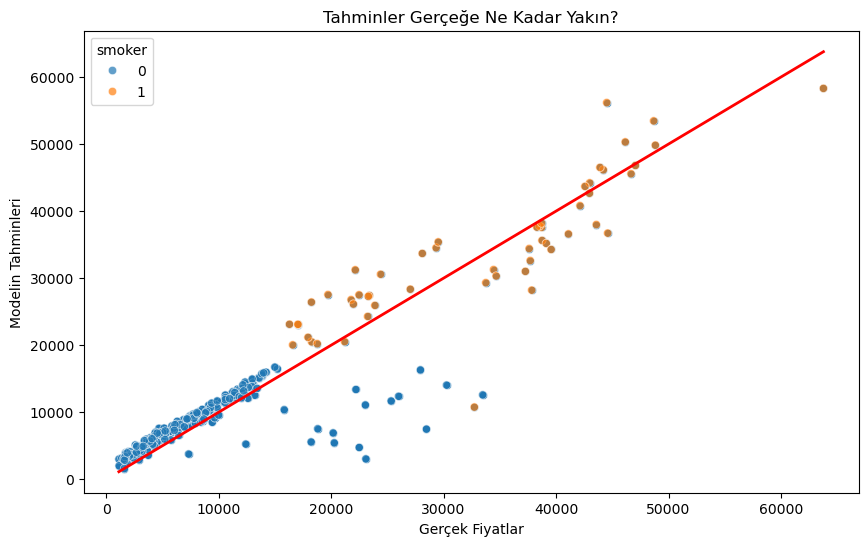

In [47]:
plt.figure(figsize=(10,6))
# 2. Noktaları çiziyoruz (Scatter Plot)
# x ekseni gerçek değerler, y ekseni bizim tahminlerimiz
sns.scatterplot(x=y_test, y=y_poly_pred)
# hue=X_test['smoker'] diyerek sigara içenleri farklı renk yapıyoruz
sns.scatterplot(x=y_test, y=y_poly_pred, hue=X_test['smoker'], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.title('Tahminler Gerçeğe Ne Kadar Yakın?')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Modelin Tahminleri')
plt.show()

In [48]:
import joblib

# 1. Modeli kaydediyoruz
joblib.dump(poly_model, 'sigorta_modeli.joblib')

# 2. Polinomal dönüştürücüyü de kaydetmeliyiz (Çünkü yeni veriyi 20 sütuna bu çeviriyor)
joblib.dump(poly, 'poly_transformer.joblib')

print("Model ve Dönüştürücü başarıyla kaydedildi! Artık her yerde kullanabilirsin.")

Model ve Dönüştürücü başarıyla kaydedildi! Artık her yerde kullanabilirsin.
